In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings .filterwarnings('ignore')
sns.set()

Importing Datasets from Keras dataset

In [2]:
from keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Converting data type of the dataset to normalize

In [6]:
x_train = x_train.astype('float64')/255

In [7]:
x_test = x_test.astype('float64')/255

In [9]:
print(x_test.dtype)

float64


Processing One hot encoding method to convert the categorical data

In [10]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [11]:
unique_numbers = len(np.unique(y_train))

In [12]:
unique_numbers

10

In [13]:
print(len(y_train))

50000


In [15]:
y_train.dtype

dtype('uint8')

In [16]:
y_train= to_categorical(y_train,unique_numbers)
y_test=to_categorical(y_test,unique_numbers)

In [17]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [21]:
print(y_train.shape)
print(x_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(45000, 10)
(45000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 10)


## Q2. Building a CNN architecture using Keras

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
model = Sequential()

Input Layer

In [26]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

Hidden Layer


In [27]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

Hidden Layer 2


In [28]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)        

Flattening the model created

In [30]:
model.add(Flatten())

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)        

Creating Hidden Layers

In [34]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [36]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [37]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)        

In [40]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 19s - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.0972 - 19s/epoch - 211ms/step
Epoch 2/10
90/90 - 17s - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0972 - 17s/epoch - 188ms/step
Epoch 3/10
90/90 - 18s - loss: 2.3026 - accuracy: 0.0963 - val_loss: 2.3028 - val_accuracy: 0.0920 - 18s/epoch - 196ms/step
Epoch 4/10
90/90 - 18s - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0972 - 18s/epoch - 199ms/step
Epoch 5/10
90/90 - 17s - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0972 - 17s/epoch - 189ms/step
Epoch 6/10
90/90 - 18s - loss: 2.3026 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.0920 - 18s/epoch - 200ms/step
Epoch 7/10
90/90 - 18s - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.0920 - 18s/epoch - 197ms/step
Epoch 8/10
90/90 - 19s - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0972 - 19s/epoch - 212ms/step
Epoch 9/

Fitting the model for plotting the graph

In [42]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.3026 - accuracy: 0.1000


In [43]:
results

[2.3025963306427, 0.10000000149011612]

In [44]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

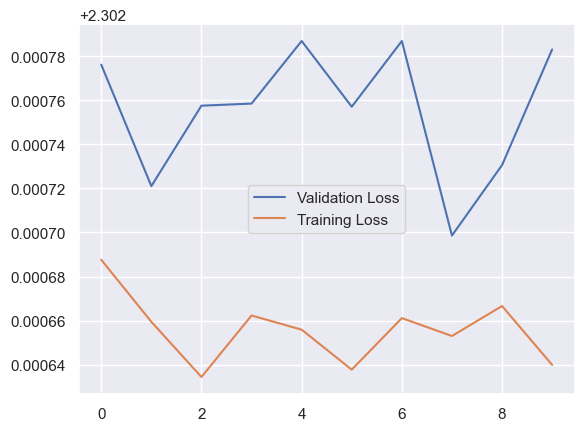

In [48]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend()

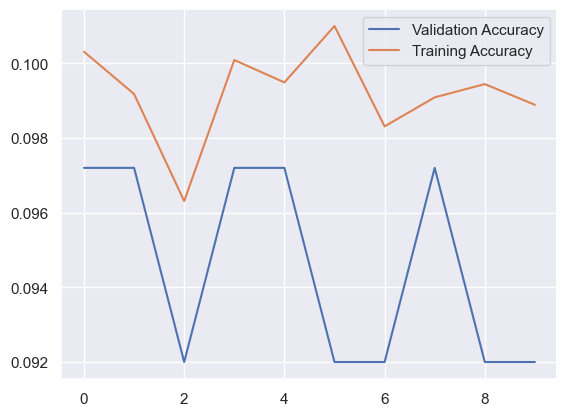

In [47]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend();